# ***Importing Required Libraries***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

# ***Loading Housing Data***

In [ ]:
data = pd.read_csv(r"/content/Housing.csv")

In [ ]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
data.shape

(545, 13)

In [ ]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [ ]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [ ]:
data.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

## ***The DataSet Contains Some Object Type Columns(yes/no) Which are need to be converted to Numbers(1/0)***

In [ ]:
#List Of Variables to change
ObjVariables = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']

#defining MAP Function
def BinaryMap(x):
    return x.map({'yes' : 1,'no': 0})

#applying BinaryMap Function for Each Object variables
data[ObjVariables] = data[ObjVariables].apply(BinaryMap)

In [ ]:
# yes --- 1
# no  --- 0
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


## ***Here the 'furnishingstatus' column has 3 types of data values, which isn't converted to binary(1/0) So we need to create dummy variables***

In [ ]:
DummyVar = pd.get_dummies(data['furnishingstatus'])
data = pd.concat([data,DummyVar], axis = 1)

In [ ]:
data.drop(['furnishingstatus'],axis = 1,inplace = True)

In [ ]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0,0


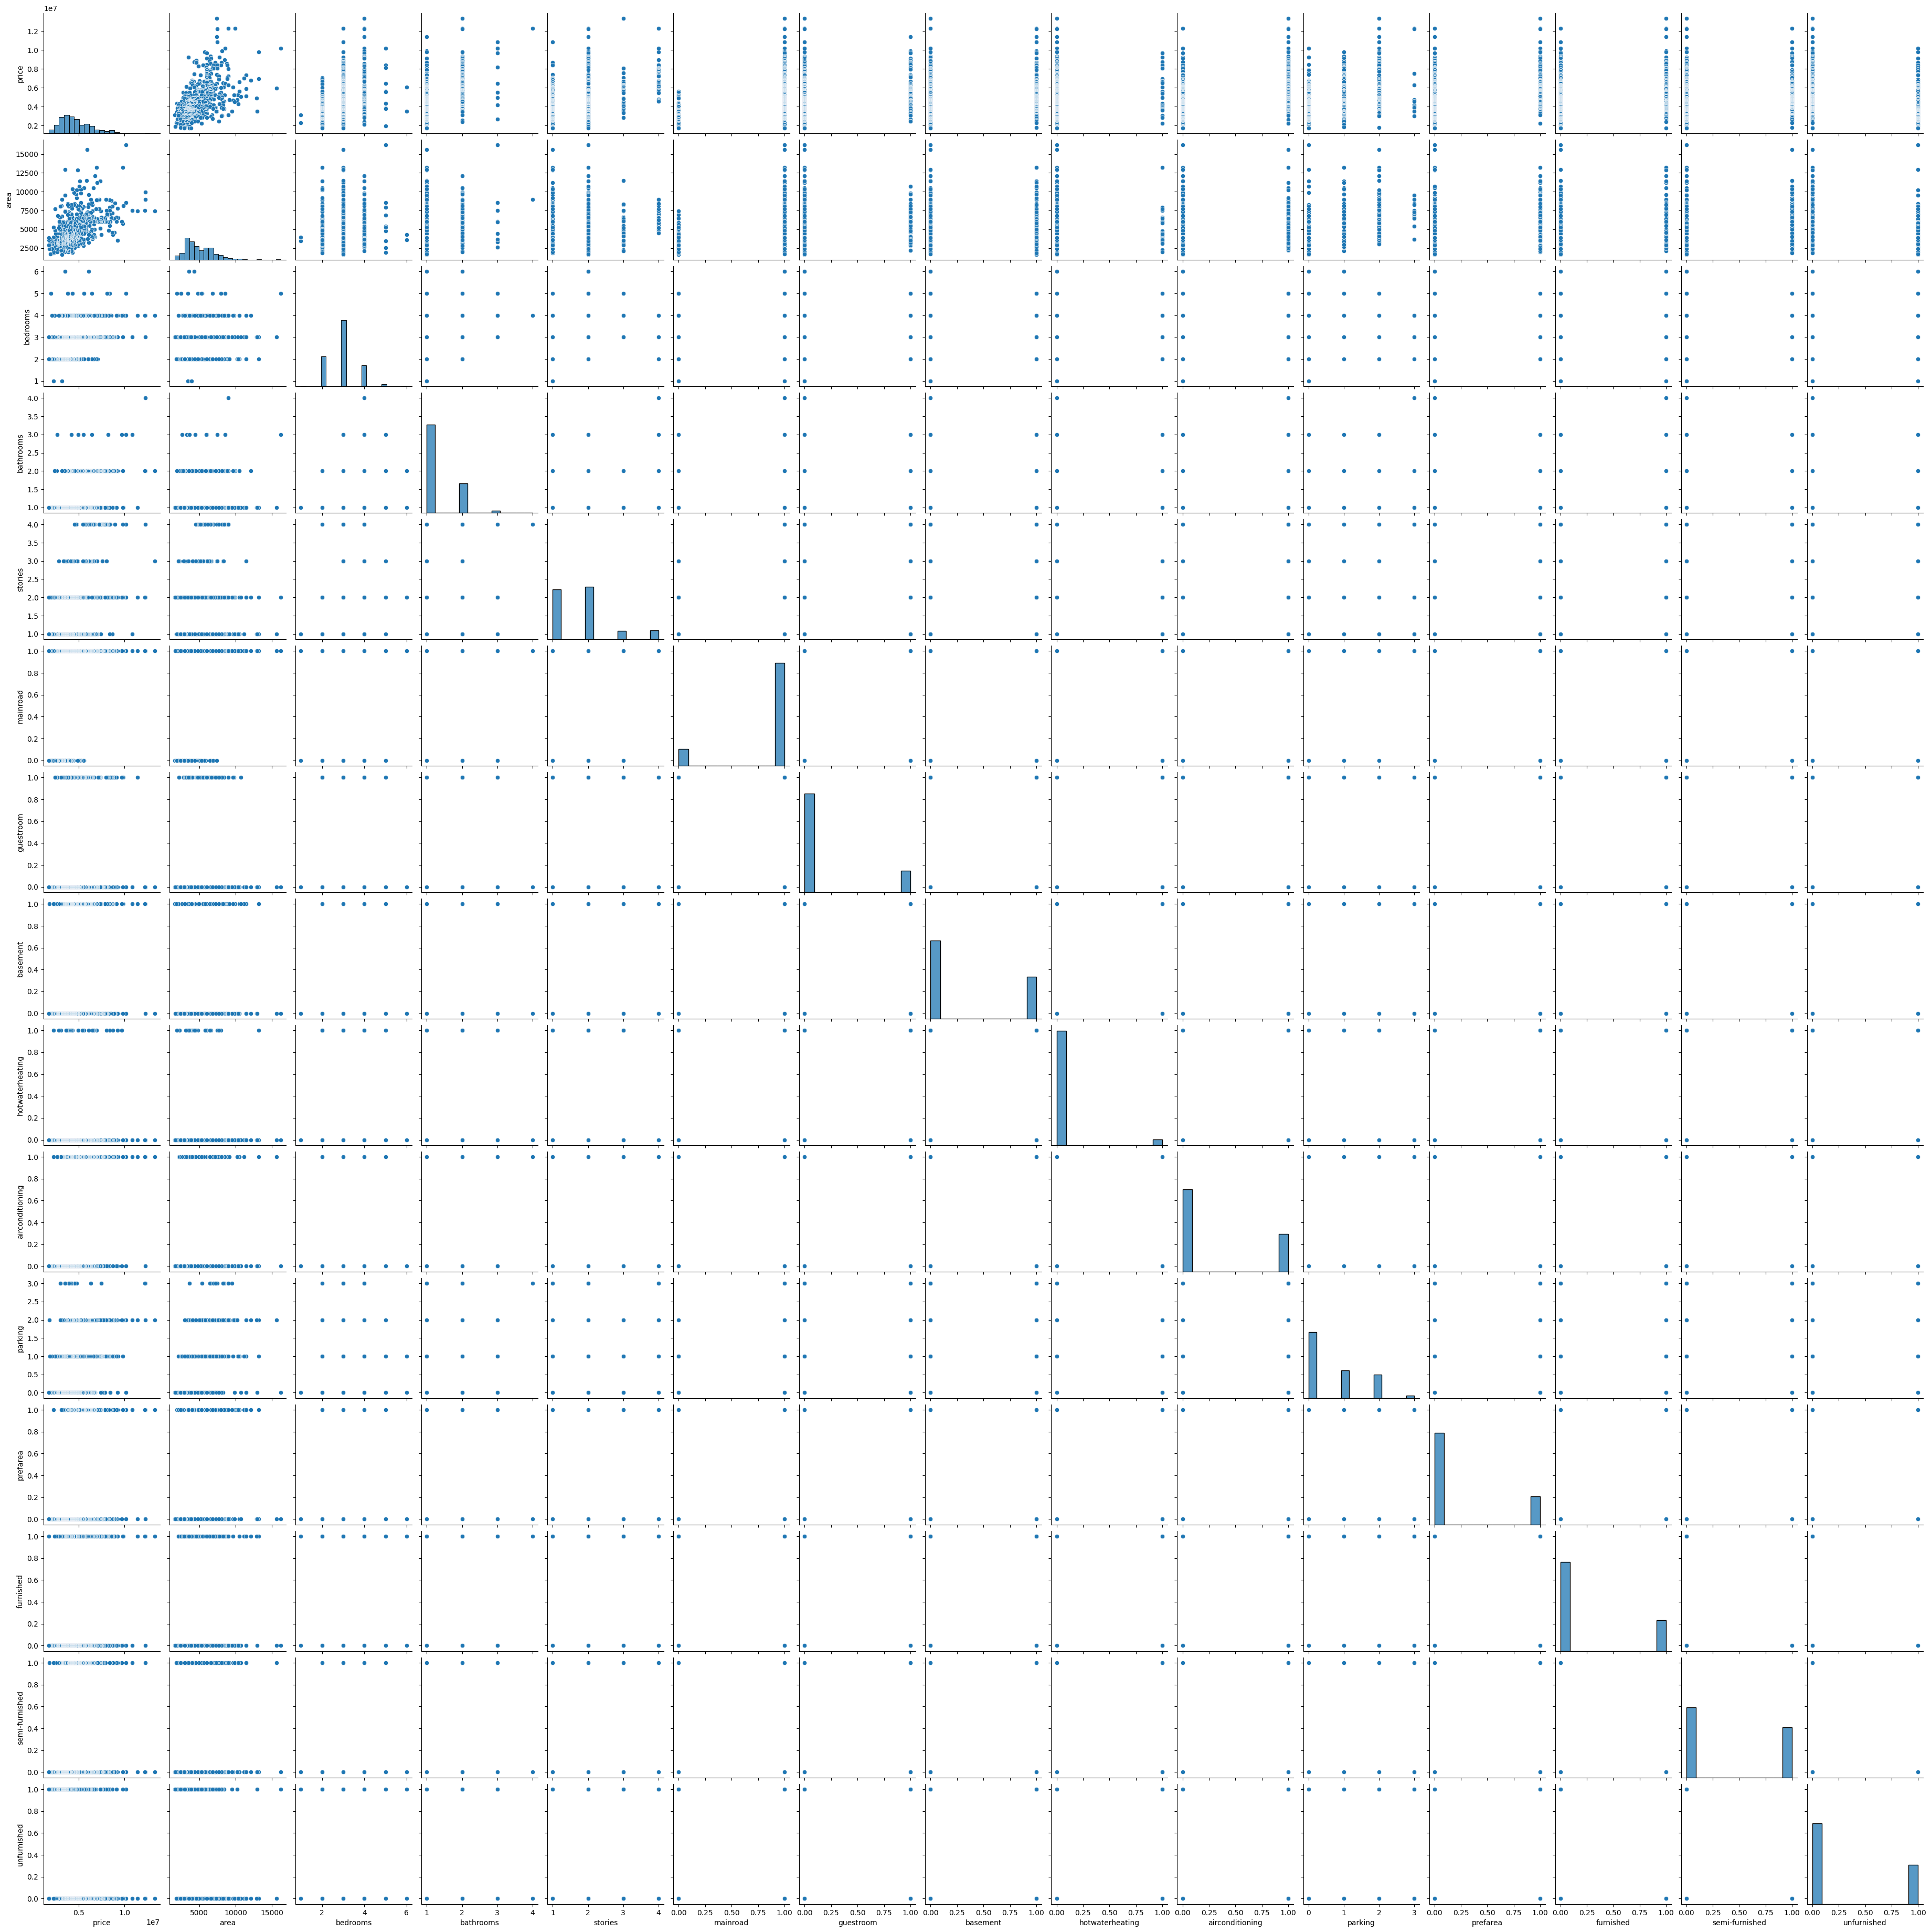

In [ ]:
sns.pairplot(data)
plt.show()

***check the correlation coefficients to see which variables are highly correlated***

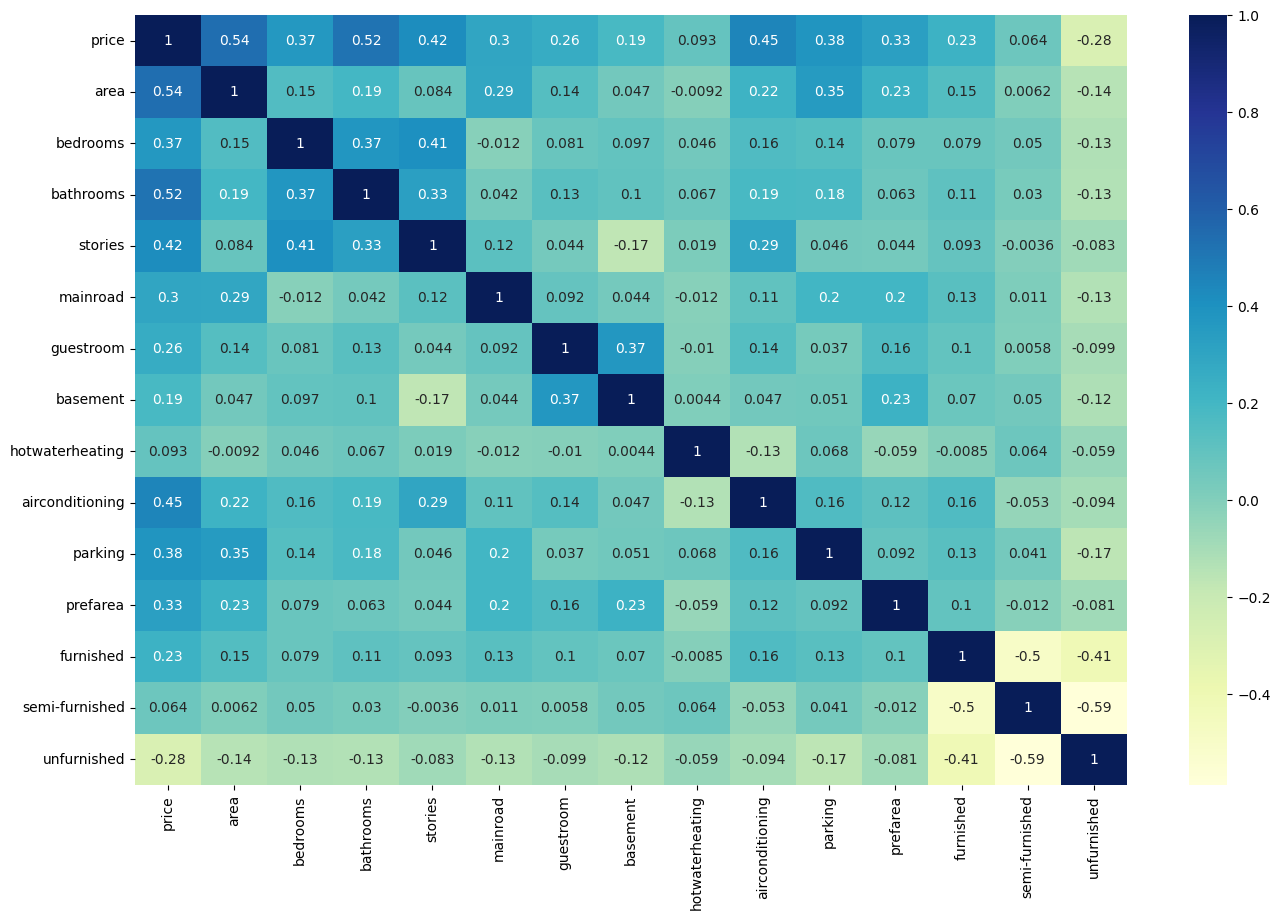

In [ ]:
plt.figure(figsize = (16, 10))
sns.heatmap(data.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [ ]:
lm = LinearRegression() #Linear Regression model
model = lm.fit(data.iloc[:,1:],data.price) #model fitting

In [ ]:
model.coef_

array([ 2.44139386e+02,  1.14787560e+05,  9.87668107e+05,  4.50848003e+05,
        4.21272589e+05,  3.00525860e+05,  3.50106904e+05,  8.55447145e+05,
        8.64958311e+05,  2.77107101e+05,  6.51543800e+05,  1.52526335e+05,
        1.06181715e+05, -2.58708051e+05])

# ***Predicting Price***

In [ ]:
y1 = model.predict([[3564, 4, 4, 4, 1, 1, 0, 1, 1, 3, 1, 1, 0, 1]]) #predicting price using independent variable data
print("Price : ",y1)

Price :  [10792460.10609721]
